In [1]:
import torch
from torch import nn

import numpy as np
from numpy import dtype
import matplotlib.pyplot as plt

from tqdm import trange

import model
from data import *
from visualization import hidden_repr

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [2]:
## Instantiate model
model = model.Model(
    input_size=1, output_size=1, hidden_dim=30, n_layers=1, device=device
)

## Generate data
dataset_1 = XOR_data(device, n_datapoints=1000, seq_len=5)
dataset_2 = XOR_data(device, n_datapoints=1000, seq_len=4)
dataset_val_1 = XOR_data(device, n_datapoints=2, seq_len=30)
dataset_val_2 = XOR_data(device, n_datapoints=10, seq_len=31)

In [72]:
## Train

# Define hyperparameters
n_epochs = 200
lr = 0.01

# Define Loss, Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training run
train_losses, val_losses, hidden_states = model.training_run(
    optimizer,
    criterion,
    [dataset_1, dataset_2],
    [dataset_val_1],
    n_epochs=n_epochs,
    batch_size=1000,
)

Epoch: 10/200............. Loss: 0.00313 Validation Loss: 0.08371
Epoch: 20/200............. Loss: 0.00019 Validation Loss: 0.05464
Epoch: 30/200............. Loss: 0.00006 Validation Loss: 0.05099
Epoch: 40/200............. Loss: 0.00002 Validation Loss: 0.04770
Epoch: 50/200............. Loss: 0.00000 Validation Loss: 0.04774
Epoch: 60/200............. Loss: 0.00000 Validation Loss: 0.04678
Epoch: 70/200............. Loss: 0.00000 Validation Loss: 0.04628
Epoch: 80/200............. Loss: 0.00000 Validation Loss: 0.04585
Epoch: 90/200............. Loss: 0.00000 Validation Loss: 0.04545
Epoch: 100/200............. Loss: 0.00000 Validation Loss: 0.04512
Epoch: 110/200............. Loss: 0.00000 Validation Loss: 0.04484
Epoch: 120/200............. Loss: 0.00000 Validation Loss: 0.04456
Epoch: 130/200............. Loss: 0.00000 Validation Loss: 0.04433
Epoch: 140/200............. Loss: 0.00000 Validation Loss: 0.04409
Epoch: 150/200............. Loss: 0.00000 Validation Loss: 0.04386
Epoc

In [59]:
x = hidden_repr(hidden_states)

In [99]:
X = np.array(hidden_states[0][0])
Y = np.array(hidden_states[1][0])
print(X.shape)
# X.set_index(["input"])
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
pd.concat([X,Y], keys=["x", "y"])

(2, 30)


0    1         2    3    4    5    6    7         8         9   ...  \
x 0  0.0  0.0  1.821681  0.0  0.0  0.0  0.0  0.0  0.883022  1.728288  ...   
  1  0.0  0.0  3.364136  0.0  0.0  0.0  0.0  0.0  1.439717  1.203430  ...   
y 0  0.0  0.0  1.980217  0.0  0.0  0.0  0.0  0.0  1.212734  1.817383  ...   
  1  0.0  0.0  3.484852  0.0  0.0  0.0  0.0  0.0  1.502769  1.192481  ...   

      20   21        22        23   24        25   26   27   28        29  
x 0  0.0  0.0  0.000000  0.970421  0.0  0.617864  0.0  0.0  0.0  0.132279  
  1  0.0  0.0  1.092613  2.501333  0.0  2.268714  0.0  0.0  0.0  0.000000  
y 0  0.0  0.0  0.000000  1.374409  0.0  0.930560  0.0  0.0  0.0  0.595040  
  1  0.0  0.0  0.742887  2.821934  0.0  2.330217  0.0  0.0  0.0  0.000000  

[4 rows x 30 columns]

In [57]:
import pandas as pd
x = pd.DataFrame([], columns=[1])
x.set_index(["A", "B"])

# x.loc["a"] = 1
x

KeyError: "None of ['A', 'B'] are in the columns"

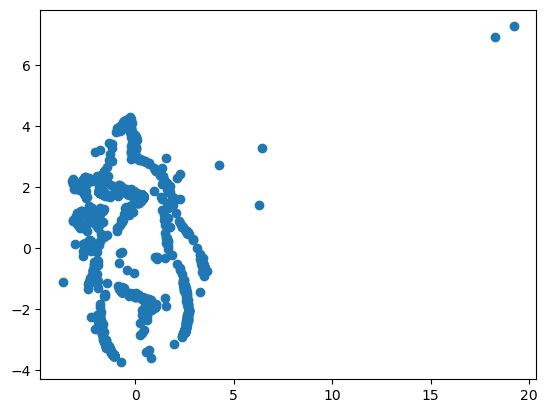

In [5]:
plt.scatter(x[:, 0], x[:, 1])

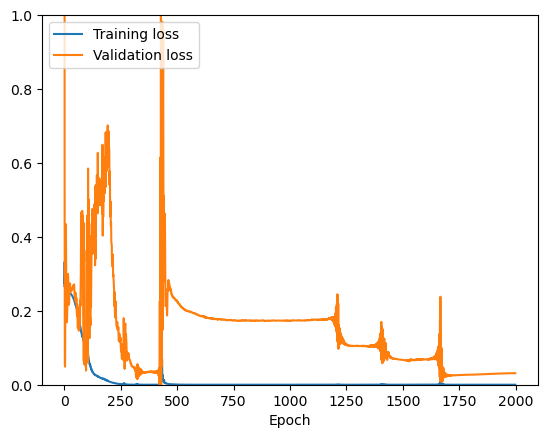

In [6]:
## Plot training and validation loss during training
skip = 0
plt.plot(train_losses[skip:], label="Training loss")
plt.plot(val_losses[skip:], label="Validation loss")
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylim(0, 1)
plt.show()

100%|██████████| 100/100 [00:04<00:00, 23.08it/s]


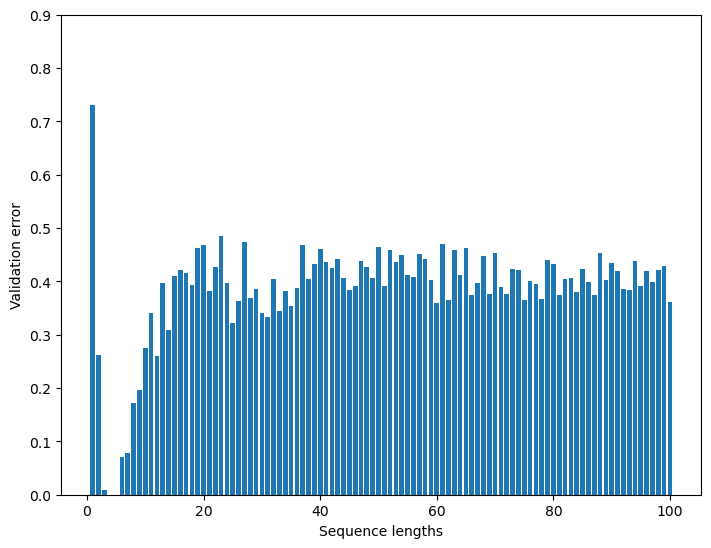

In [7]:
## Plot error per sequence length
N = 100
val_data = []
for n in trange(1, N + 1):
    val_data.append(XOR_data(device, n_datapoints=100, seq_len=n))
val_err = np.array(model.validation(criterion, val_data))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(np.arange(1, N + 1), val_err)
ax.set_xlabel("Sequence lengths")
ax.set_ylabel("Validation error")
ax.set_yticks(np.arange(0, 1, 0.1))
plt.show()

In [8]:
def predict(model, sequence):
    input = torch.unsqueeze(
        torch.from_numpy(np.array([sequence], dtype=np.float32)), dim=2
    ).to(device)
    out, hidden = model(input)
    return out

In [9]:
print(float(predict(model, [1, 0, 1, 0, 1, 0, 0, 1])))

0.1937650889158249
